In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import optimize
from scipy.optimize import basinhopping
from scipy.integrate import odeint
from scipy import fftpack
import pandas as pd
from matplotlib.colors import LogNorm

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

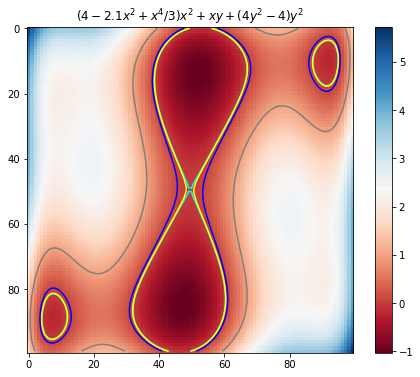

Global minimum value: 
 -1.0316284534877955 

Global minima x: 
 [-0.08984141  0.71265608] 

Global minimum value with basinhopping: 
 -1.0316284534898772 

Global minima x with basinhopping: 
 [ 0.08984201 -0.71265641] 

Global minimum value [initial guess (𝑥,𝑦)=(0,0)]: 
 0.0 

Global minima x [initial guess (𝑥,𝑦)=(0,0)]: 
 [0. 0.] 

Global minimum value with basinhopping [initial guess (𝑥,𝑦)=(0,0)]: 
 -1.0316284534898774 

Global minima x with basinhopping [initial guess (𝑥,𝑦)=(0,0)]: 
 [ 0.08984201 -0.7126564 ] 

Basinhopping is still capable of finding the correct solutions even with initial guess (𝑥,𝑦)=(0,0) because it works differently from scipy.optimize.minimize() that gives a wrong solution instead.


In [2]:
# Defining the function
def f(params):
    x,y=params
    return (4 - 2.1 * x**2 +(x**4)/3) * x**2 + x * y + (4 * y**2 - 4) * y**2
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(x,y)
Z = f((X,Y))


# Plotting the function
fig = plt.figure(figsize=(8, 6))
im = pylab.imshow(Z,cmap='RdBu')
pylab.colorbar(im)
plt.title('$(4-2.1x^2 +x^4/3)x^2 + xy + (4y^2 - 4)y^2$')
plt.contour(Z,levels=[0.001,0.01,0.1,1],colors=['cyan', 'yellow', 'blue','grey'])
plt.show()

# Calculating the global minima with scipy.optimize.minimize()
initial_guess = [-2,2]
result = optimize.minimize(f, initial_guess)
print('Global minimum value: \n', result['fun'], '\n')
print('Global minima x: \n', result['x'], '\n')


# Compare the global minima results with basinhopping
solution = basinhopping(f, initial_guess, stepsize=1)
print('Global minimum value with basinhopping: \n', solution['fun'], '\n')
print('Global minima x with basinhopping: \n', solution['x'],  '\n')


# Initial guess of (𝑥,𝑦)=(0,0)
initial_guess = [0,0]
result = optimize.minimize(f, initial_guess)
print('Global minimum value [initial guess (𝑥,𝑦)=(0,0)]: \n', result['fun'], '\n')
print('Global minima x [initial guess (𝑥,𝑦)=(0,0)]: \n', result['x'], '\n')

solution = basinhopping(f, initial_guess, stepsize=1)
print('Global minimum value with basinhopping [initial guess (𝑥,𝑦)=(0,0)]: \n', solution['fun'], '\n')
print('Global minima x with basinhopping [initial guess (𝑥,𝑦)=(0,0)]: \n', solution['x'],  '\n')

print('\033[1m'+'Basinhopping is still capable of finding the correct solutions even with initial guess (𝑥,𝑦)=(0,0) because it works differently from scipy.optimize.minimize() that gives a wrong solution instead.'+"\033[0m")

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\Omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

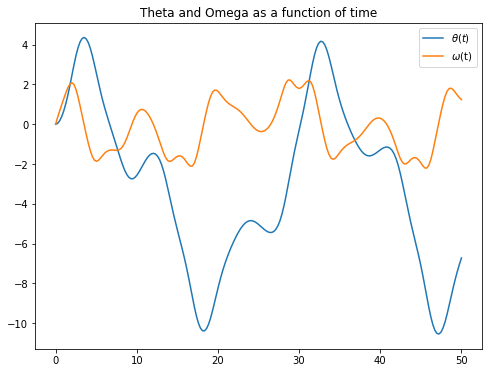

In [37]:
# Initial conditions
Xinit = (0,0)
𝑄 = 2.0
d = 1.5
Omega = 0.65
t = np.linspace(0, 50, 200)


# Defining the derivative
def derivative(X, t, Q, d, Omega):
    return(X[1], (-1/Q) * X[1] + np.sin(X[0]) + d * np.cos(Omega * t))

# call the odeint() method
X = odeint(derivative, Xinit , t, args=(Q, d, Omega))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(t, X[:,0], label = r"$\theta(t)$")
plt.plot(t, X[:,1], label = r"$\omega$(t)")
plt.title('Theta and Omega as a function of time')
plt.legend(loc='best')

We can see that variating parameters the plot become more chaotic while Omega value is increasing


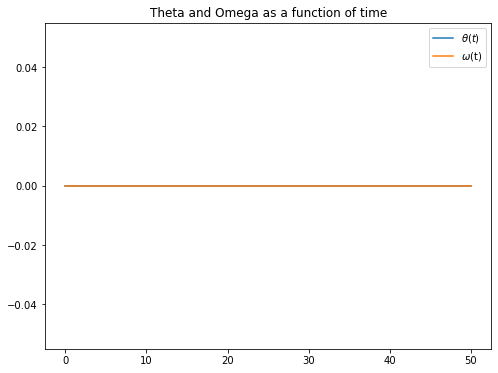

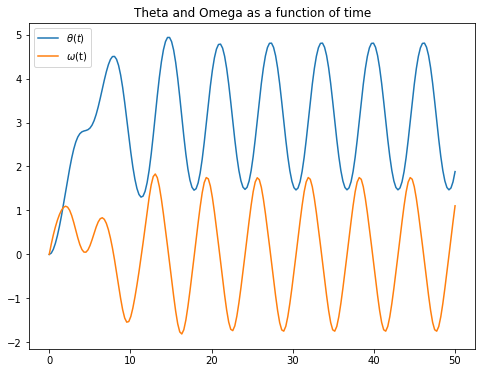

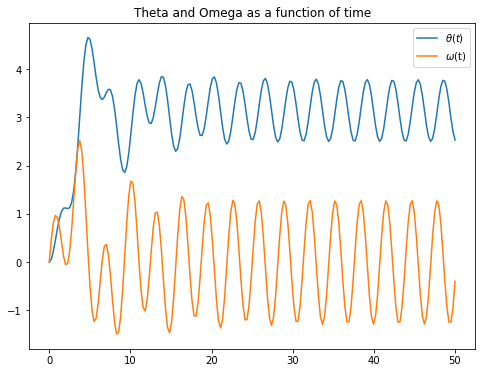

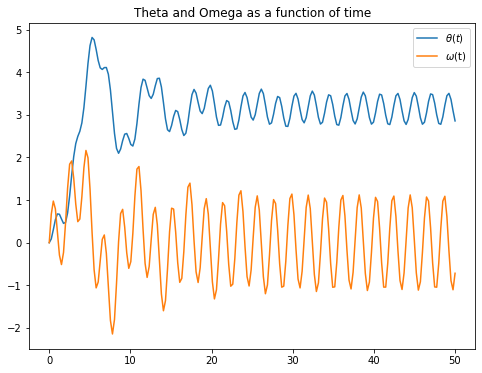

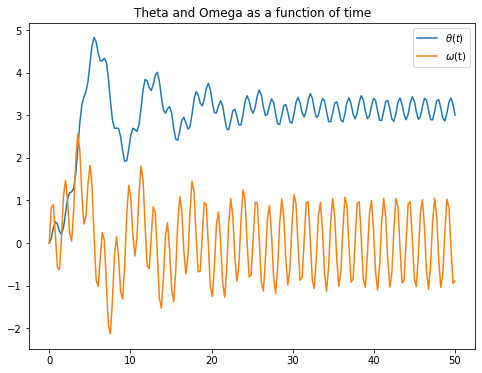

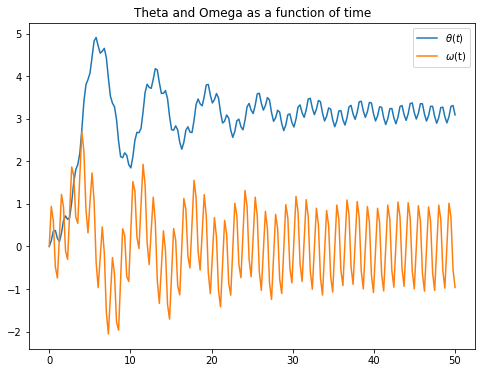

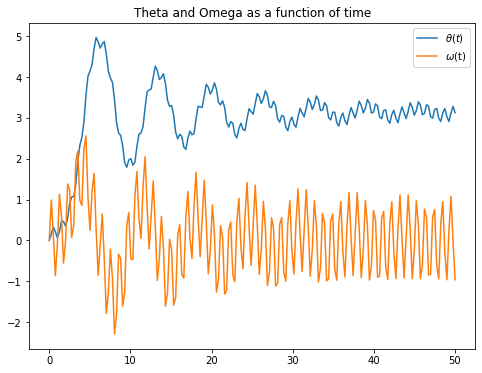

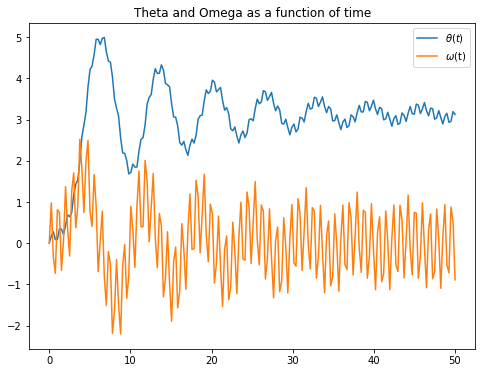

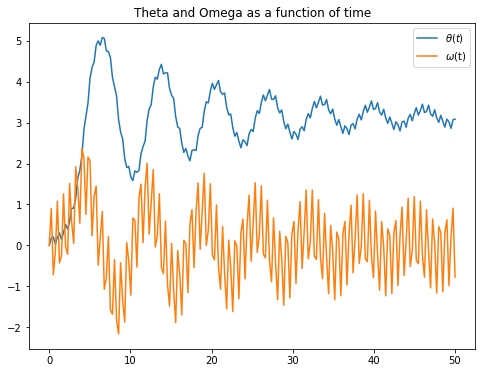

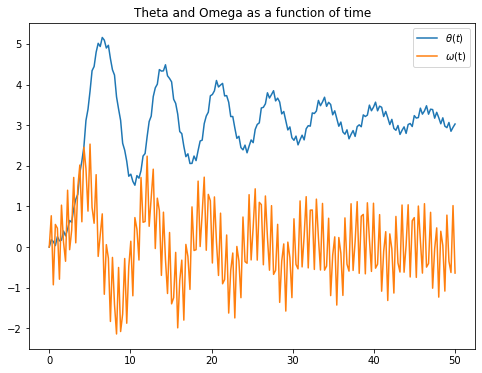

In [64]:
# Chaotic Motion

# Initial conditions
Xinit = (0,0)
𝑄 = 2.0
d = 1.5
Omega = 0.65
t = np.linspace(0, 50, 200)


# Defining the derivative
def derivative(X, t, Q, d, Omega):
    return(X[1], (-1/Q) * X[1] + np.sin(X[0]) + d * np.cos(Omega * t))

def plot_results(Xinit,t,Q,d,Omega):
    X = odeint(derivative, Xinit , t, args=(Q, d, Omega))
    plt.figure(figsize=(8, 6))
    plt.plot(t, X[:,0], label = r"$\theta(t)$")
    plt.plot(t, X[:,1], label = r"$\omega$(t)")
    plt.title('Theta and Omega as a function of time')
    plt.legend(loc='best')

for i in range(10):
    d= i
    Q = i+1
    Omega = i
    #Omega = 100+i
    plot_results(Xinit,t,Q,d,Omega)
# We can see that variating parameters the plot become more chaotic while Omega value is increasing
print('We can see that variating parameters the plot become more chaotic while Omega value is increasing')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [6]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2022-12-26 17:08:03--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2022-12-26 17:08:04--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc222411e9c1e7eb26748aced37b.dl.dropboxusercontent.com/cd/0/inline/BzV0FsjOw7ezTSpovyW2grCR2612q9hx0eR4sOsVXJF20PIPT5lWQPK8GA56UZKcWvIdQ5kf40UOsm63IAmKq68WjqBXOlgHDrF45w510sUD3D_V-TxB2ZJX-zCXE0onBahjn0dvZH0CsA9K23V0MKPP2WeyFslYTiRgOhYc9OysQw/file# [following]
--2022-12-26 17:08:04--  https://uc222411e9c1e7eb26748aced37b.dl.dropboxusercontent.com/cd/0/inline/BzV0FsjOw7ezTSpovyW2grCR2612q9hx0eR4sOsVXJF20PIPT5lWQPK8GA56UZKcWvIdQ5kf40UOsm63IAmKq68WjqBXOlgHD

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


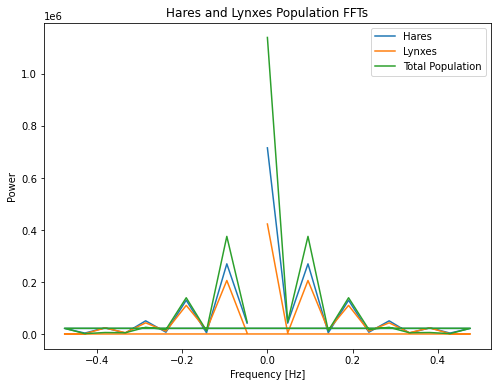

Hares Peak frequency: 0.09523809523809523
Hares period is :  10.5  years 

Lynxes Peak frequency: 0.09523809523809523
Lynxes period is :  10.5  years 

Total Population Peak frequency: 0.09523809523809523
Total population period is :  10.5  years 



In [18]:
# Loading the data and choosing the features
data = pd.read_csv('data/populations.txt', delimiter='	')
display(data)
hare_pop = data['hare']
lynx_pop = data['lynx']
tot_pop = data['hare']+data['lynx']
date = data['year']
date = date.to_numpy()
hare_pop = hare_pop.to_numpy()
lynx_pop = lynx_pop.to_numpy()
tot_pop = tot_pop.to_numpy()


# Computing the FFTs
hare_fft = fftpack.fft(hare_pop)
hare_power = np.abs(hare_fft)
hare_sample_freq = fftpack.fftfreq(len(hare_fft), 1)

lynx_fft = fftpack.fft(lynx_pop)
lynx_power = np.abs(lynx_fft)
lynx_sample_freq = fftpack.fftfreq(len(lynx_fft), 1)

tot_fft = fftpack.fft(tot_pop)
tot_power = np.abs(tot_fft)
tot_sample_freq = fftpack.fftfreq(len(tot_fft), 1)

# Plot the FFT power
fig = plt.figure(figsize=(8, 6))
plt.plot(hare_sample_freq, hare_power, label='Hares')
plt.plot(lynx_sample_freq, lynx_power, label='Lynxes')
plt.plot(tot_sample_freq, tot_power, label='Total Population')
plt.legend(loc='best')
plt.title('Hares and Lynxes Population FFTs')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.show()

# Find the peak frequency: focus only on only the positive frequencies
hare_pos_mask = np.where(hare_sample_freq > 0)
hare_freqs = hare_sample_freq[hare_pos_mask]
hare_powes = hare_power[hare_pos_mask]

lynx_pos_mask = np.where(lynx_sample_freq > 0)
lynx_freqs = lynx_sample_freq[lynx_pos_mask]
lynx_powes = lynx_power[lynx_pos_mask]

tot_pos_mask = np.where(tot_sample_freq > 0)
tot_freqs = tot_sample_freq[tot_pos_mask]
tot_powes = tot_power[tot_pos_mask]

# Find the max of freqs array
hare_peak_freq = hare_freqs[hare_powes.argmax()]
print("Hares Peak frequency:", hare_peak_freq)
print('Hares period is : ', 1/hare_peak_freq, ' years \n')

lynx_peak_freq = lynx_freqs[lynx_powes.argmax()]
print("Lynxes Peak frequency:", lynx_peak_freq)
print('Lynxes period is : ' , 1/lynx_peak_freq, ' years \n')

tot_peak_freq = tot_freqs[tot_powes.argmax()]
print("Total Population Peak frequency:", tot_peak_freq)
print('Total population period is : ', 1/tot_peak_freq, ' years \n')




4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

237 315
474 630


Text(0.5, 1.0, 'Frequency Domain')

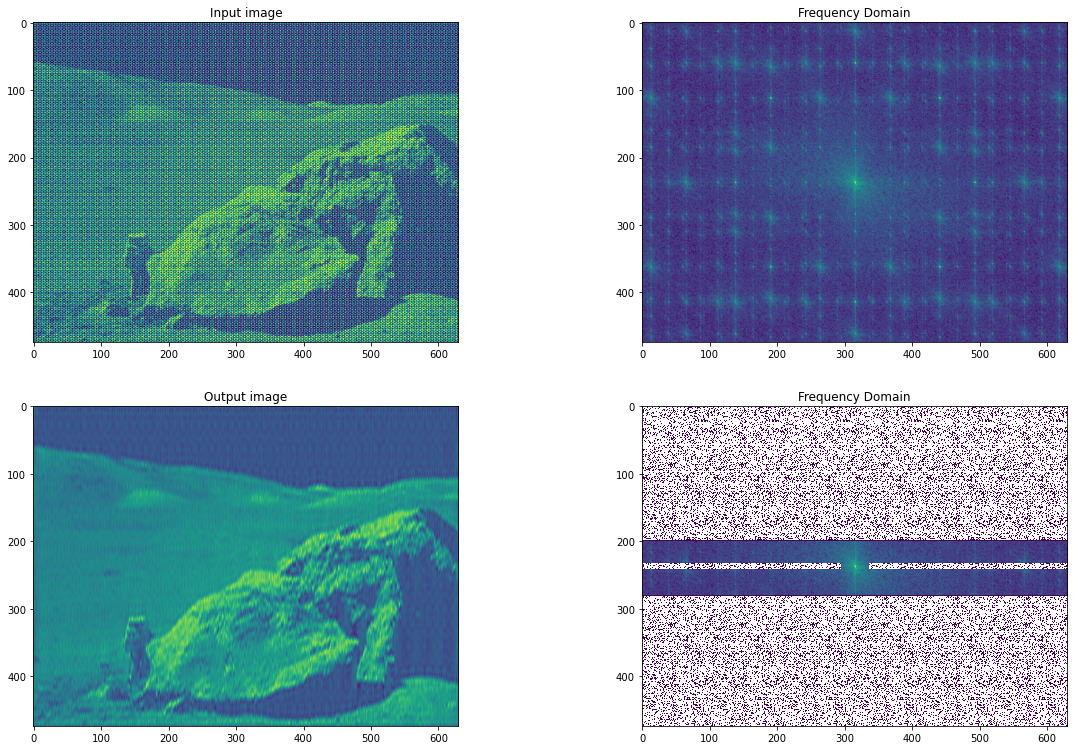

In [70]:
# Loading the image
image = plt.imread("images/moonlanding.png")

# Creating the frequency domain of the input image
imagefft = fftpack.fft2(np.double(image))
imagefft = fftpack.fftshift(imagefft)
power = np.abs(imagefft)

# Slicing the frequency domain in order to remove the noise
rows, cols = image.shape
crow,ccol = rows//2 , cols//2
imagefft[crow-5:crow+5,0:ccol-20] = 0
imagefft[crow-5:crow+5,ccol+20:] = 0
imagefft[0:200,:] = 0
imagefft[280:rows,:] = 0


# Inverse FFT for re-obtaining the original image without noise
f_ishift = np.fft.ifftshift(imagefft)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)


# Plotting the results
gridsize = (3, 2)
plt.figure(figsize=(20, 20))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0))
ax4 = plt.subplot2grid(gridsize, (1, 1))

ax1.imshow(image)
ax1.set_title('Input image')

ax2.imshow(power, norm=LogNorm(vmin=5))
ax2.set_title('Frequency Domain')

ax3.imshow(img_back)
ax3.set_title('Output image')

ax4.imshow(np.abs(imagefft), norm=LogNorm(vmin=5))
ax4.set_title('Frequency Domain')


**Method N.2**

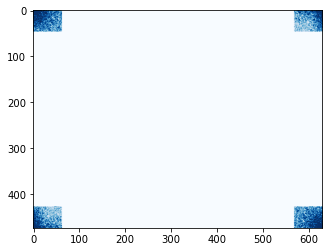

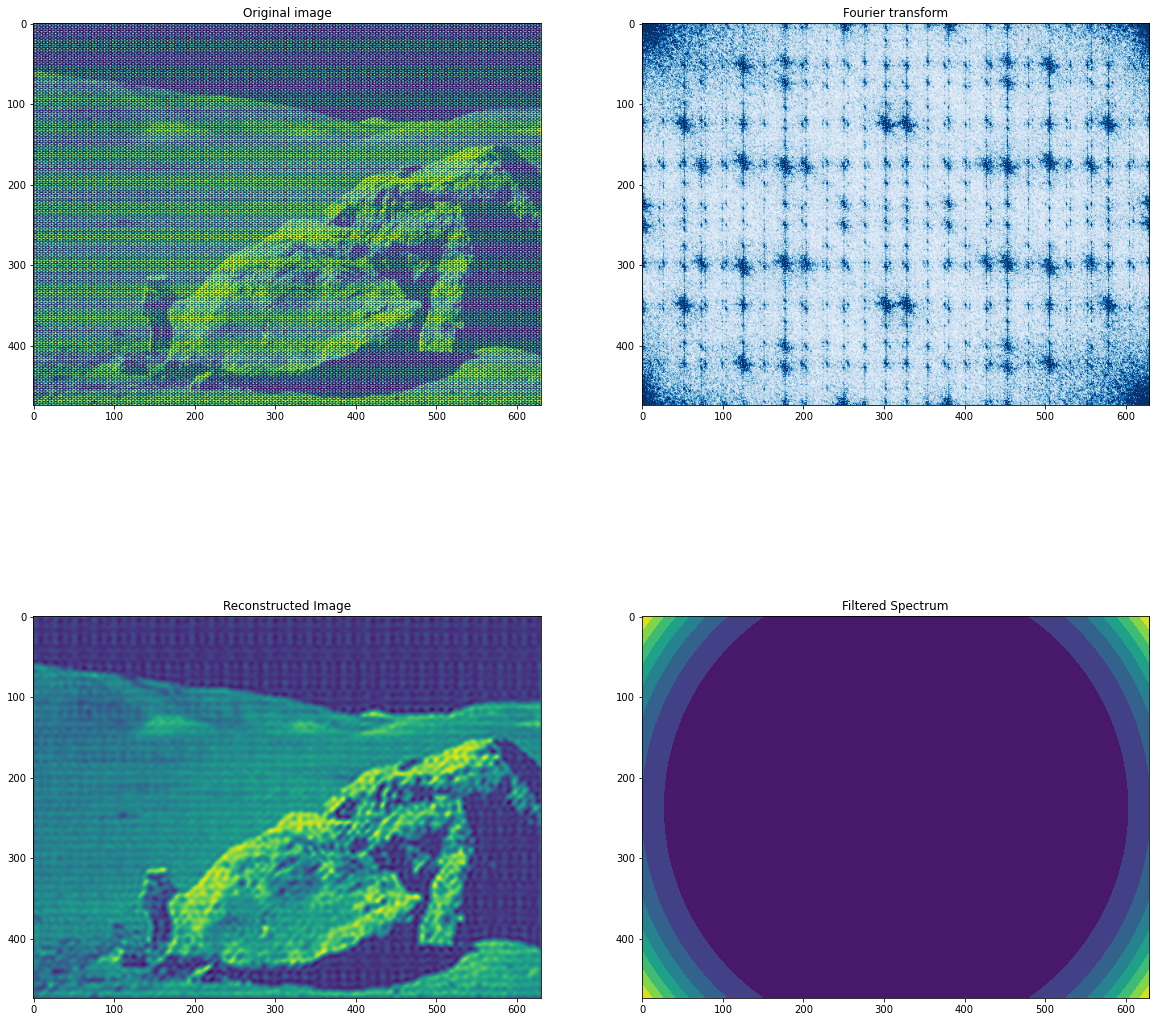

In [49]:
def plot_spectrum(F, amplify=1000, ax=None):

    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)
    
fname = plt.imread('images/moonlanding.png')
fname.astype(float)
plt.imshow(fname,cmap='gray')

F = np.fft.fft2(fname)
keep_fraction = 0.1

ff = np.copy(F)

r = ff.shape[0]
c = ff.shape[1]


# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
a = int(np.round(r*keep_fraction))
b = int(np.round(r*(1-keep_fraction)))
ff[a:b,:] = 0.0
y = int(np.round(c*keep_fraction))
z= int(np.round(c*(1-keep_fraction)))
# Similarly with the columns:
ff[:,y:z] = 0.0

plot_spectrum(ff)

def image_grid(im, F, im2, F2):
    """Display a grid with two images and their corresponding
    Fourier spectra.
    """
    fig, ax = plt.subplots(2, 2, figsize=(20,20))
    
    ax[0,0].set_title('Original image')
    ax[0,0].imshow(im)
    
    ax[0,1].set_title('Fourier transform')
    plot_spectrum(F, ax=ax[0,1])
    
    ax[1,1].set_title('Filtered Spectrum')
    plot_spectrum(F2, ax=ax[1,1])
    
    ax[1,0].set_title('Reconstructed Image')
    ax[1,0].imshow(im2)


im_new = np.fft.ifft2(ff).real
image_grid(fname,F,im_new,ff)

a = 1/(315.0**2+237.0**2)**4
k = 4.0
x = np.arange(0, 630, 1)
y = np.arange(0, 474, 1)
xx, yy = np.meshgrid(x, y)
z = 1-np.exp(-a*((xx-315.0)**2 + (yy-237.0)**2)**k) 
h = plt.contourf(x,y,z)